In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_suicidio = pd.read_csv("/content/drive/MyDrive/suicidios_2010_a_2019.csv" )
df_estado_ano = pd.read_csv("/content/drive/MyDrive/suicidios_por_estados_por_ano.csv")

<ipython-input-7-9e6bad32429c>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_suicidio = pd.read_csv("/content/drive/MyDrive/suicidios_2010_a_2019.csv" )


##Estados com mais números de casos



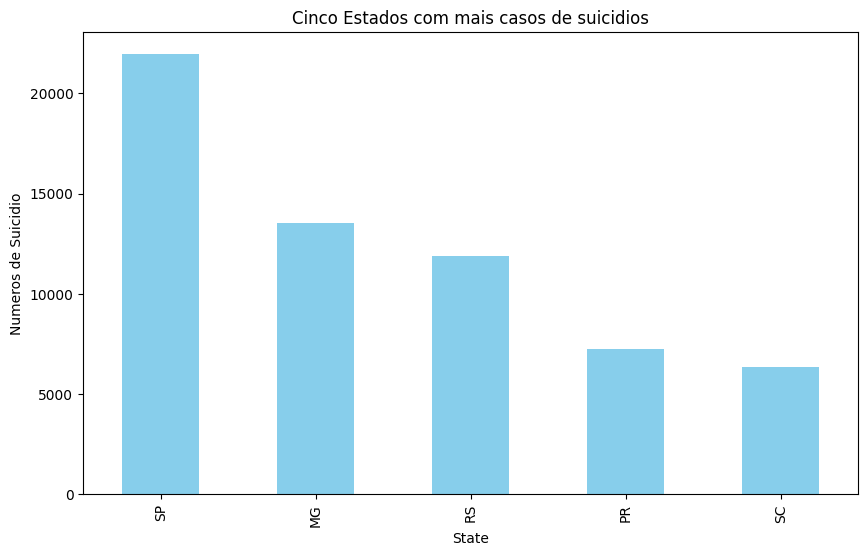

In [ ]:
contagem_estado = df_suicidio['estado'].value_counts()


top_states = contagem_estado.head(5)

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue')
plt.title('Cinco Estados com mais casos de suicidios')
plt.xlabel('State')
plt.ylabel('Numeros de Suicidio')
plt.show()

##Estados com menos números de casos


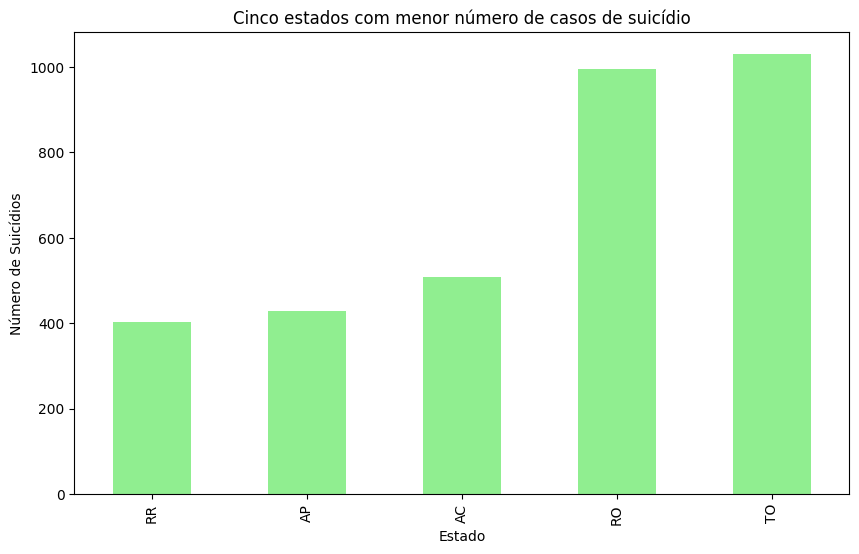

In [ ]:
contagem_estado = df_suicidio['estado'].value_counts()

# Ordenar os estados pelo número de casos de suicídio em ordem crescente
estados_com_menos_suicidio = contagem_estado.sort_values().head(5)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
estados_com_menos_suicidio.plot(kind='bar', color='lightgreen')
plt.title('Cinco estados com menor número de casos de suicídio')
plt.xlabel('Estado')
plt.ylabel('Número de Suicídios')
plt.show()

## Casos por gênero

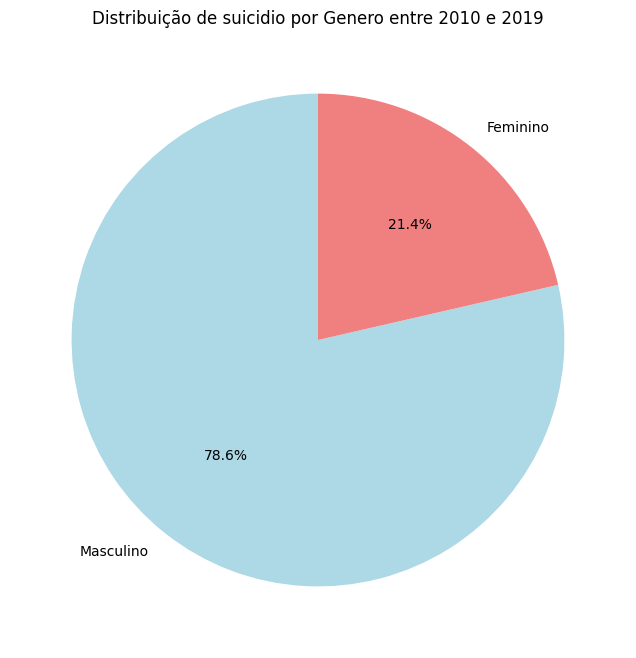

In [ ]:
contagem_genero = df_suicidio['SEXO'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribuição de suicidio por Genero entre 2010 e 2019')
plt.show()

In [ ]:
df_suicidio['DTNASC'] = pd.to_datetime(df_suicidio['DTNASC'], errors='coerce')


df_suicidio['Idade'] = (pd.to_datetime('now') - df_suicidio['DTNASC']).astype('<m8[Y]')


media_idade_homem = df_suicidio[df_suicidio['SEXO'] == 'Masculino']['Idade'].mean()
media_idade_mulher = df_suicidio[df_suicidio['SEXO'] == 'Feminino']['Idade'].mean()

print(f'Média de idade dos homens: {media_idade_homem:.2f} anos')
print(f'Média de idade das mulheres: {media_idade_mulher:.2f} anos')


Média de idade dos homens: 49.97 anos
Média de idade das mulheres: 49.03 anos


<ipython-input-11-6fd2b51160ac>:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df_suicidio['Idade'] = (pd.to_datetime('now') - df_suicidio['DTNASC']).astype('<m8[Y]')


### Média de idade de homens : 49.96
### Média de idade de mulheres: 49.02

Gênero por faixa etária

<ipython-input-12-1e5bf7de2d7b>:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df_suicidio['Idade'] = (pd.to_datetime('now') - df_suicidio['DTNASC']).astype('<m8[Y]')


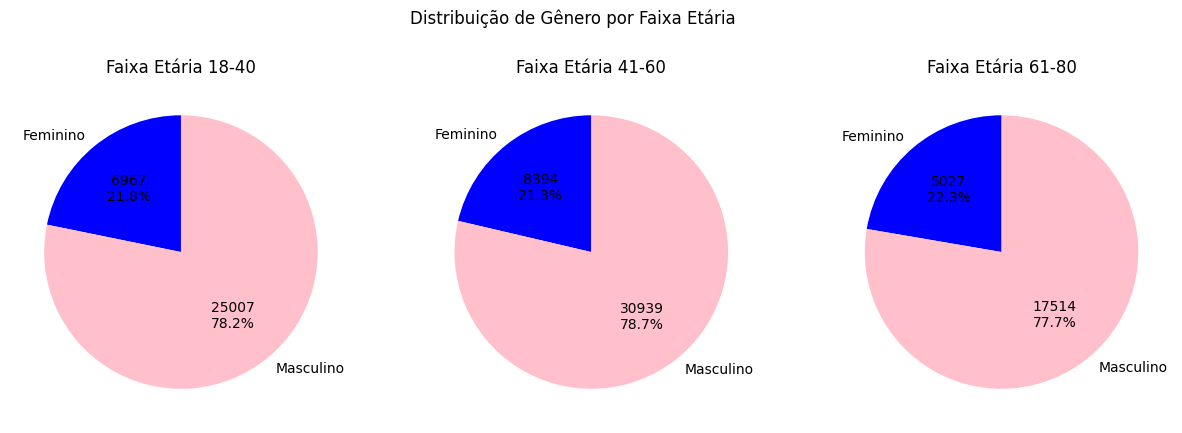

In [ ]:
df_suicidio['DTNASC'] = pd.to_datetime(df_suicidio['DTNASC'], errors='coerce')


df_suicidio['Idade'] = (pd.to_datetime('now') - df_suicidio['DTNASC']).astype('<m8[Y]')

df_suicidio['Faixa Etária'] = pd.cut(df_suicidio['Idade'], bins=[18, 40, 60, 80], labels=['18-40', '41-60', '61-80'], right=False)


contagem_por_faixa_etaria = df_suicidio.groupby(['SEXO', 'Faixa Etária']).size().unstack()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, faixa_etaria in enumerate(contagem_por_faixa_etaria.columns):
    contagem_por_genero = contagem_por_faixa_etaria[faixa_etaria]
    axs[i].pie(contagem_por_genero, labels=contagem_por_genero.index, autopct=lambda p: f'{int(p * sum(contagem_por_genero) / 100)}\n{p:.1f}%', startangle=90, colors=['blue', 'pink'])
    axs[i].set_title(f'Faixa Etária {faixa_etaria}')

plt.suptitle('Distribuição de Gênero por Faixa Etária')
plt.show()

## Locais com mais casos

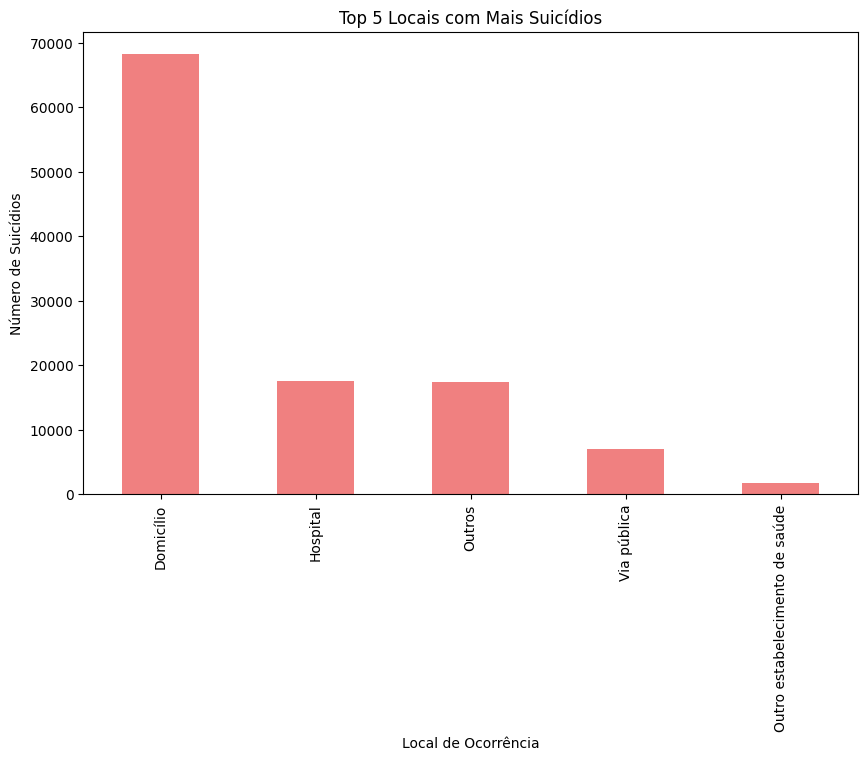

In [ ]:
contagem_por_local = df_suicidio['LOCOCOR'].value_counts().head(5)


plt.figure(figsize=(10, 6))
contagem_por_local.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Locais com Mais Suicídios')
plt.xlabel('Local de Ocorrência')
plt.ylabel('Número de Suicídios')
plt.show()

## Casos por Etnia

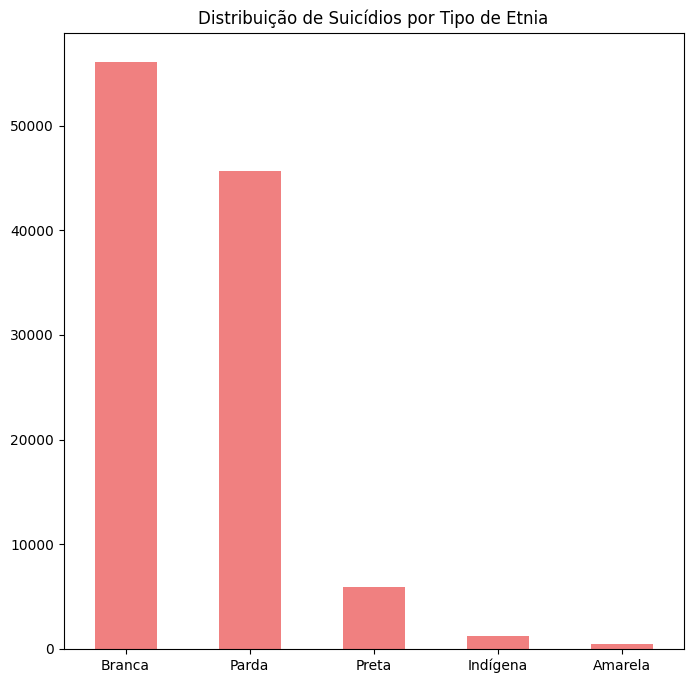

In [ ]:
contagem_por_etnia = df_suicidio['RACACOR'].value_counts()

# Configurar o tamanho da figura
plt.figure(figsize=(8, 8))

# Aumentar o distanciamento entre as etiquetas (labels)
contagem_por_etnia.plot(kind='bar', color='lightcoral')

# Adicionar título e remover o rótulo do eixo y
plt.title('Distribuição de Suicídios por Tipo de Etnia')
plt.ylabel('')
plt.xticks(rotation=0)
# Exibir o gráfico
plt.show()

## Casos por estado civil


Solteiro/a                  56523
Casado/a                    30001
Separado/a judicialmente     7771
União consensual             5280
Viúvo/a                      4216
Name: ESTCIV, dtype: int64


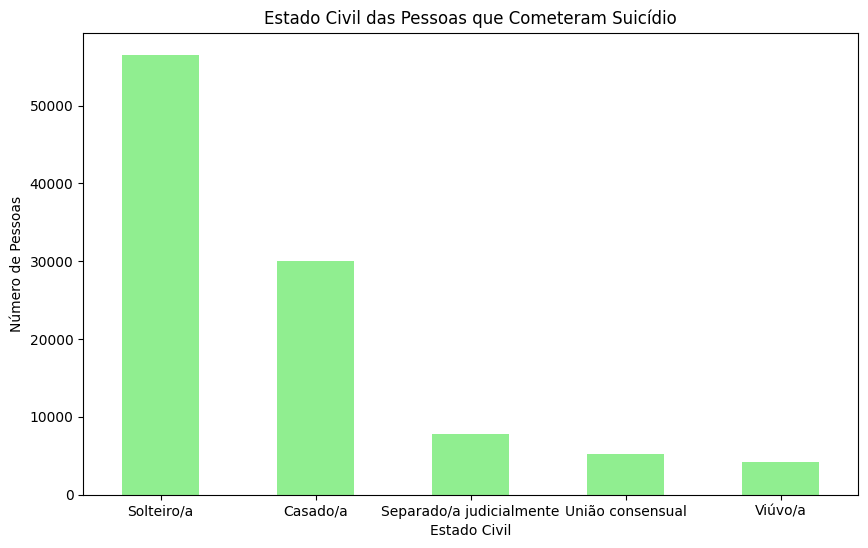

In [ ]:
contagem_estado_civil = df_suicidio['ESTCIV'].value_counts()
print(contagem_estado_civil)

plt.figure(figsize=(10, 6))
contagem_estado_civil.plot(kind='bar', color='lightgreen')
plt.title('Estado Civil das Pessoas que Cometeram Suicídio')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)

plt.show()

## Causas de óbitos mais registradas

X700    53359
X709    11851
X740     3596
X708     3418
X704     2603
Name: CAUSABAS, dtype: int64


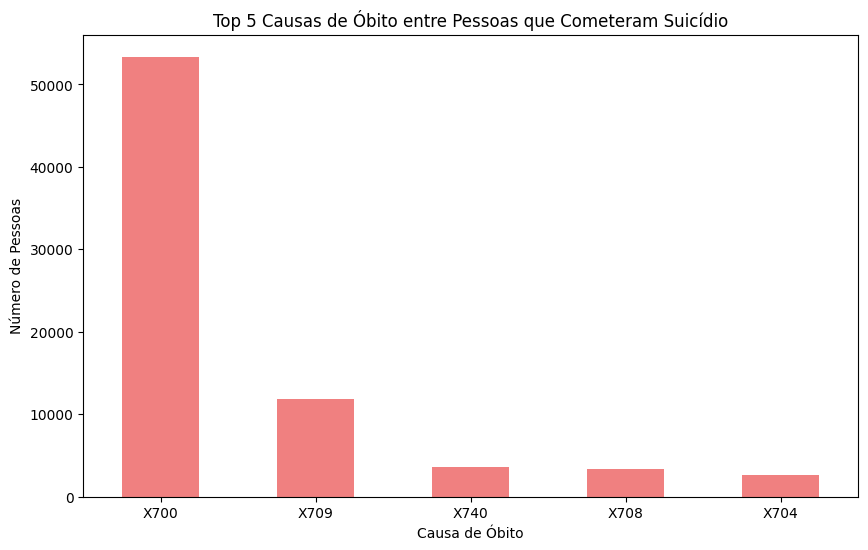

In [ ]:
contagem_causas_obito = df_suicidio['CAUSABAS'].value_counts().head(5)

print(contagem_causas_obito)
plt.figure(figsize=(10, 6))
contagem_causas_obito.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Causas de Óbito entre Pessoas que Cometeram Suicídio')
plt.xlabel('Causa de Óbito')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)

plt.show()

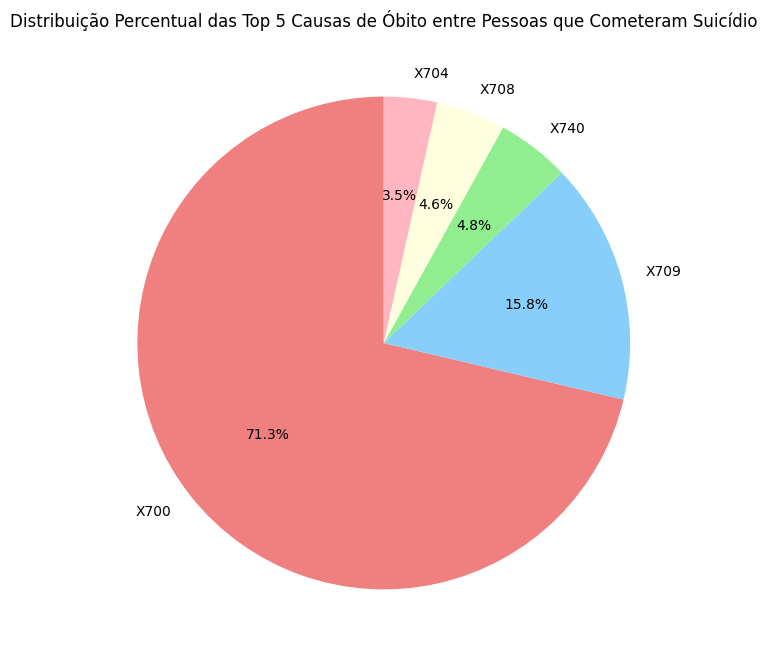

In [ ]:
contagem_causas_obito = df_suicidio['CAUSABAS'].value_counts().head(5)

plt.figure(figsize=(8, 8))
contagem_causas_obito.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow', 'lightpink'])
plt.title('Distribuição Percentual das Top 5 Causas de Óbito entre Pessoas que Cometeram Suicídio')
plt.ylabel('')
plt.show()

## Quantidade de casos por mês

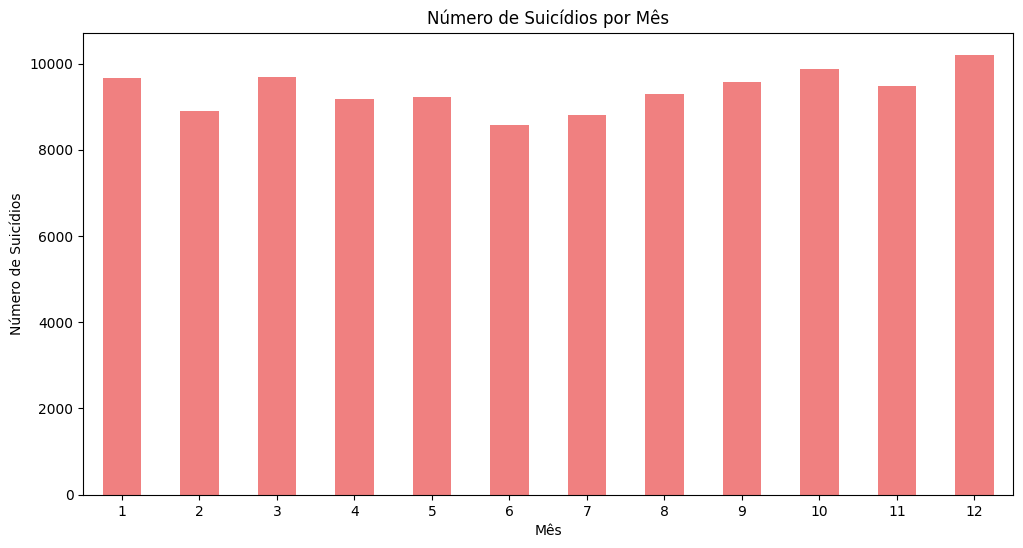

In [ ]:
contagem_por_mes = df_suicidio['mes'].value_counts()


plt.figure(figsize=(12, 6))
contagem_por_mes.sort_index().plot(kind='bar', color='lightcoral')
plt.title('Número de Suicídios por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Suicídios')
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

## Estado com mais casos em cada mês 2019

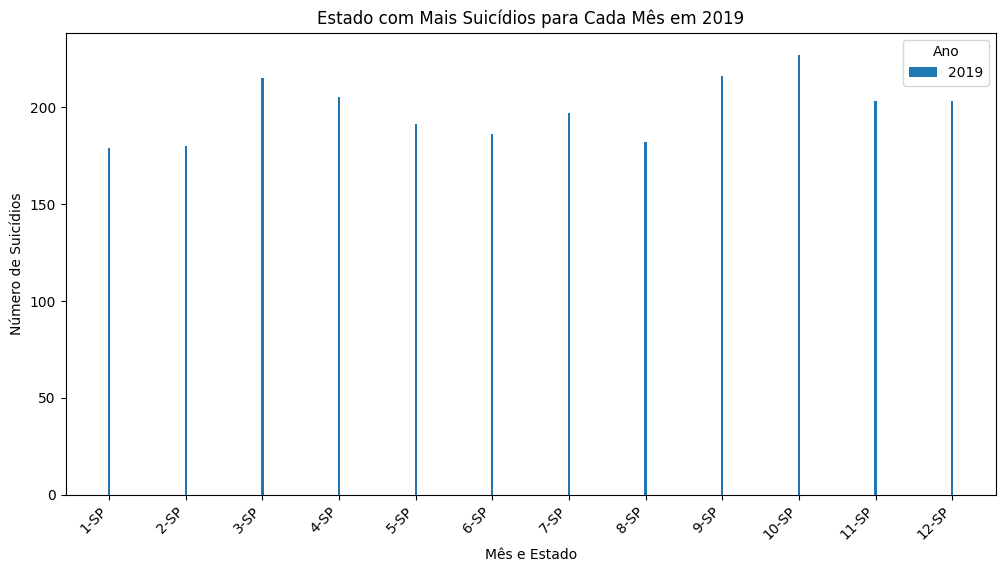

In [ ]:
df_suicidio['ano'] = pd.to_datetime(df_suicidio['DTOBITO']).dt.year


df_suicidio_2019 = df_suicidio[df_suicidio['ano'] == 2019]


contagem_por_mes_estado = df_suicidio_2019.groupby(['ano', 'mes', 'estado']).size().reset_index(name='num_suicidios')


idx_max_suicidios = contagem_por_mes_estado.groupby(['ano', 'mes'])['num_suicidios'].idxmax()
estado_max_suicidios = contagem_por_mes_estado.loc[idx_max_suicidios]

plt.figure(figsize=(12, 6))
for ano in estado_max_suicidios['ano'].unique():
    df_ano = estado_max_suicidios[estado_max_suicidios['ano'] == ano]
    plt.bar(df_ano.index, df_ano['num_suicidios'], label=str(ano))

plt.title('Estado com Mais Suicídios para Cada Mês em 2019')
plt.xlabel('Mês e Estado')
plt.ylabel('Número de Suicídios')
plt.xticks(estado_max_suicidios.index, estado_max_suicidios[['mes', 'estado']].astype(str).agg('-'.join, axis=1), rotation=45, ha='right')
plt.legend(title='Ano')
plt.show()

## Escolaridades das pessoas que faleceram

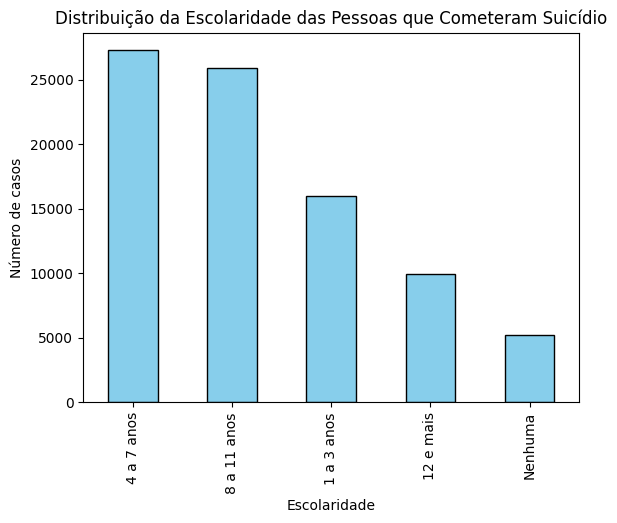

In [ ]:
escolaridade = df_suicidio['ESC']


contagem_escolaridade = escolaridade.value_counts()


contagem_escolaridade.plot(kind='bar', color='skyblue', edgecolor='black')


plt.xlabel('Escolaridade')
plt.ylabel('Número de casos')
plt.title('Distribuição da Escolaridade das Pessoas que Cometeram Suicídio')


plt.show()

## Quantidade de casos por região

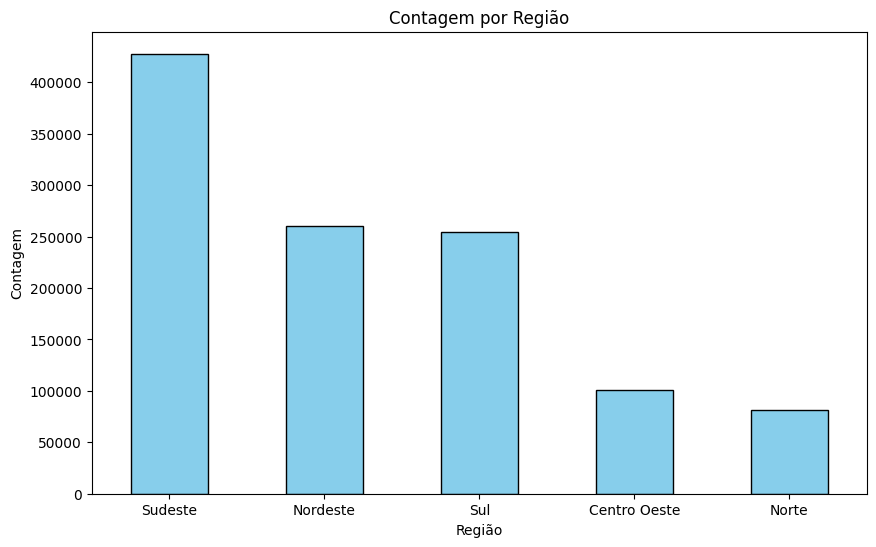

In [ ]:
df_suicidio_estado = pd.merge(df_suicidio, df_estado_ano, left_on='estado', right_on='abrev_estado')
df_contagem_regiao = df_suicidio_estado['regiao'].value_counts()
plt.figure(figsize=(10, 6))
df_contagem_regiao.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Contagem por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_contagem_regiao

Sudeste         427830
Nordeste        260300
Sul             254610
Centro Oeste    100680
Norte            81490
Name: regiao, dtype: int64

## Quantidade de casos PE

In [ ]:
df_estado_pe = df_suicidio.query("estado == 'PE'")
contagem_por_estado_pe = df_estado_pe['estado'].value_counts()
contagem_por_estado_pe

PE    3583
Name: estado, dtype: int64

### Quantidade de casos por ano PE

In [ ]:
df_contagem_pe_ano = df_estado_pe['ano'].value_counts().sort_values(ascending=False)

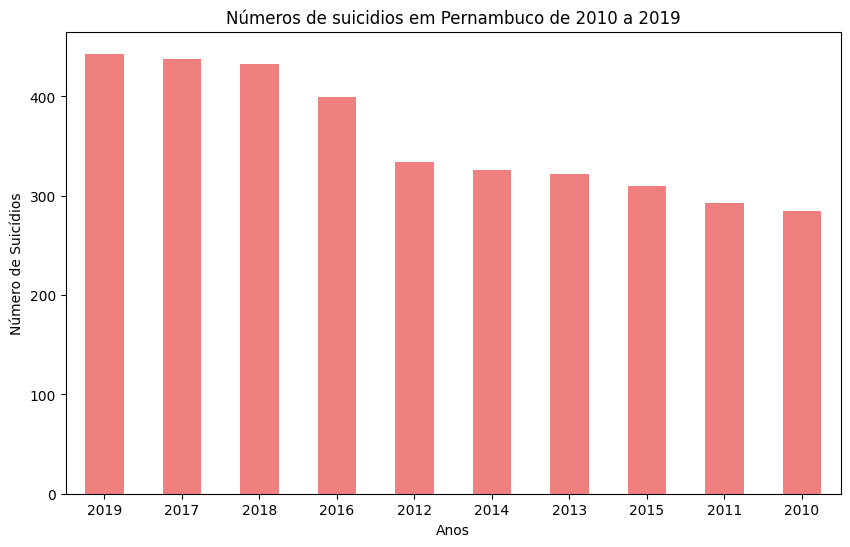

In [ ]:
plt.figure(figsize=(10, 6))
df_contagem_pe_ano.plot(kind='bar', color='lightcoral')
plt.title('Números de suicidios em Pernambuco de 2010 a 2019')
plt.xlabel('Anos')
plt.ylabel('Número de Suicídios')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_contagem_pe_ano

2019    443
2017    438
2018    433
2016    399
2012    334
2014    326
2013    322
2015    310
2011    293
2010    285
Name: ano, dtype: int64

## Cidades PE com mais casos

In [ ]:
df_pe_cidade = df_estado_pe['CODMUNRES'].value_counts()

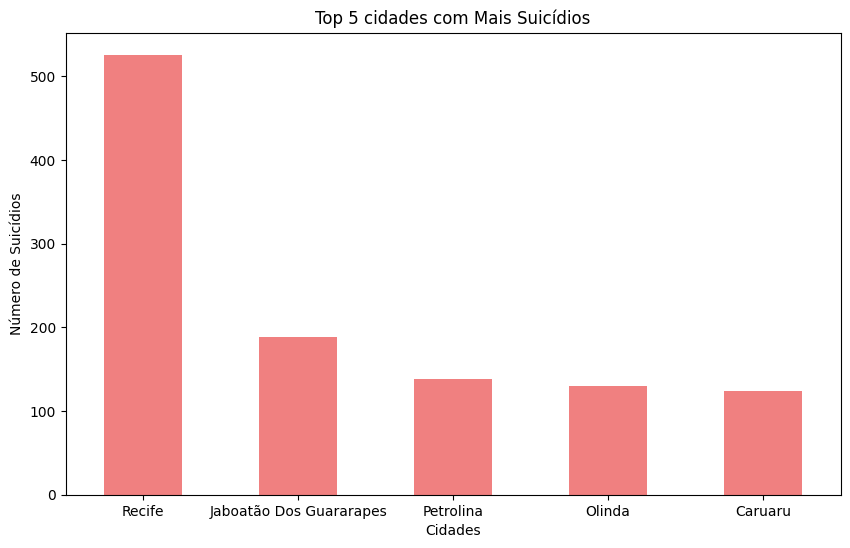

In [ ]:
top_5_cidads = df_pe_cidade.head(5)
plt.figure(figsize=(10, 6))
top_5_cidads.plot(kind='bar', color='lightcoral')
plt.title('Top 5 cidades com Mais Suicídios')
plt.xlabel('Cidades')
plt.ylabel('Número de Suicídios')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top_5_cidads

Recife                     526
Jaboatão Dos Guararapes    188
Petrolina                  138
Olinda                     130
Caruaru                    124
Name: CODMUNRES, dtype: int64

SEXO       Feminino  Masculino  Total
ASSISTMED                            
Não           10443      45863  56306
Sim            5091       9276  14367


<Figure size 1500x800 with 0 Axes>

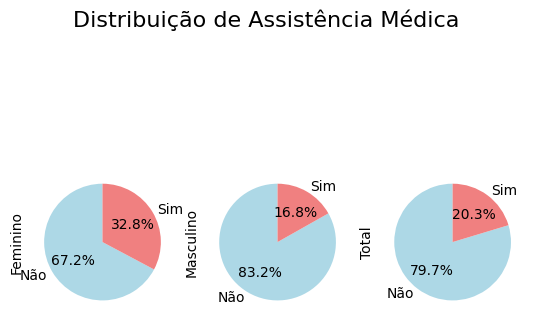

In [ ]:

contagem_assistencia_medica_genero = df_suicidio.groupby(['ASSISTMED', 'SEXO']).size().unstack()
contagem_assistencia_medica_genero['Total'] = contagem_assistencia_medica_genero.sum(axis=1)
print(contagem_assistencia_medica_genero)
plt.figure(figsize=(15, 8))
contagem_assistencia_medica_genero.plot(kind='pie', autopct='%1.1f%%', startangle=90, subplots=True, layout=(1, 3),
                                        colors=['lightblue', 'lightcoral', 'lightgreen'], legend=False)
plt.suptitle('Distribuição de Assistência Médica ', fontsize=16)
plt.show()

